# Descriptive statistics 
Dataset: Dataset of academic performance evolution for engineering students published April 18th 2020, collected by the Colombian Institute for the Evaluation of Education (ICFES) in xlsx format: **data_academic_performance.xlsx**

The following plots will be presented: 
- Number of individuals by gender
- Number of individuals by socio-economic level by attribute STRATUM
- Number of individuals by gender&socio-economic level


- Distribution of grades by gender (before and after college)
- Distribution of grades by socio-economic-level (before and after college)
- Distribution of grades by gender&socio-economic level (before and after college)


- Matrix showing the Pearson correlation between grades (before), grades (after), gender, socio-economic level
- Scatter-plot showing the correlation between grades before vs after college. 


The plots can be visualized for standardized, normalized or raw data. Change the df configuration accordingly. 

## Load packages

In [22]:
import pandas as pd
pd.set_option("display.max_columns", None)
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib as mpl
import numpy as np

## Plots setup

In [23]:
def setup_mpl():
    mpl.rcParams["font.family"] = "Helvetica Neue"
    mpl.rcParams["font.size"] = 11
    mpl.rcParams["figure.figsize"] = (7,2.5)
    mpl.rcParams["figure.dpi"] = 200
    # mpl.rcParams["lines.linewidth"] = 1
setup_mpl()

## Load dataset

In [24]:
df = pd.read_csv("df_sum_score.csv")
# df_norm = pd.read_csv("df_sum_score_norm.csv")
# df_stand = pd.read_csv("df_sum_score_stand.csv")

# TODO disse csv'er skal laves i data, så de kan loades her

# Distributions

## Number of individuals by gender

In [25]:
# Skal rykkes til Data.ipynb
df = pd.read_csv("dropped_col_df.csv")
df = df[df.STRATUM!='0']

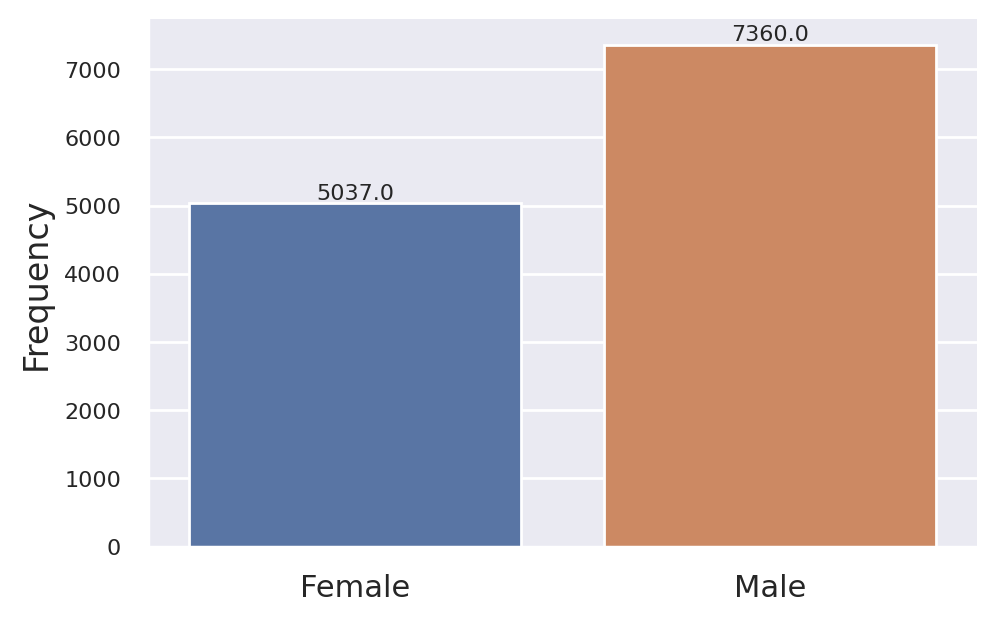

In [26]:
g = sns.catplot(x='GENDER', data=df, kind='count', legend=True)
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.set_xticklabels(['Female','Male'])
ax.xaxis.set_tick_params(labelsize=11)
ax.yaxis.set_tick_params(labelsize=8)

# Save as a SVG and PNG
plt.savefig("gender_amount.png")

#TODO TITLE

## Number of individuals by gender & socio-economic level - barplot

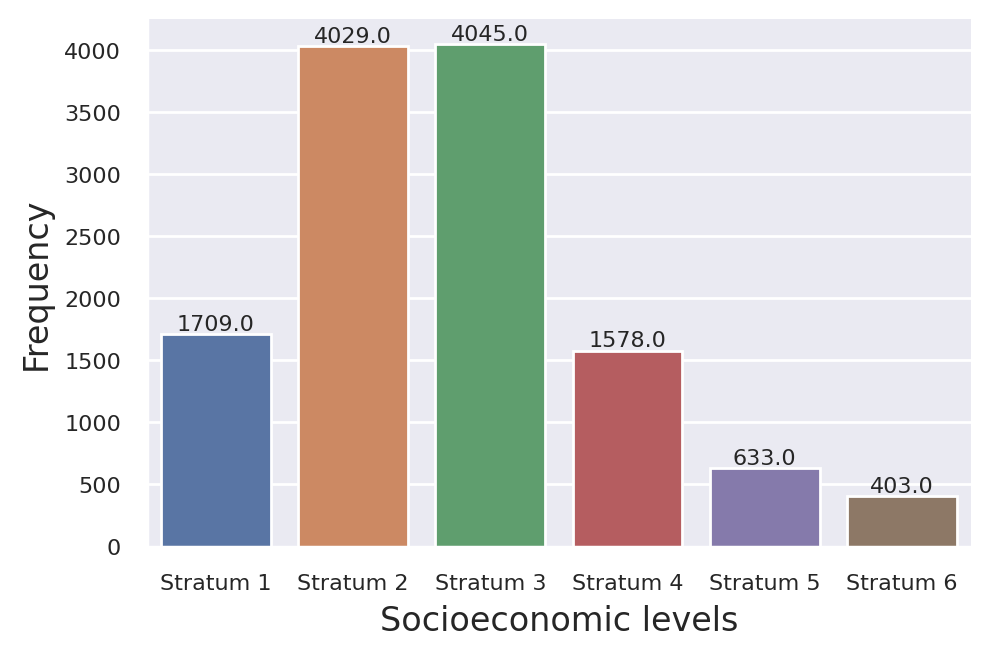

In [29]:
g = sns.catplot(x="STRATUM", kind="count",   data=df, legend=True, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
g.fig.set_size_inches(5, 3)

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)

# iterate through the axes containers
for c in ax.containers:
    labels = [f'{(v.get_height()):.1f}' for v in c]

    ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)
ax.set_xlabel('Socioeconomic levels', fontdict=None, labelpad=None)
ax.set_ylabel('Frequency', fontdict=None, labelpad=None)
ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)

# Save as a SVG and PNG
plt.savefig("STRATUM_amount.png")
#TODO TITLE

## Number of individuals by gender & socio-economic level - Stacked barplot

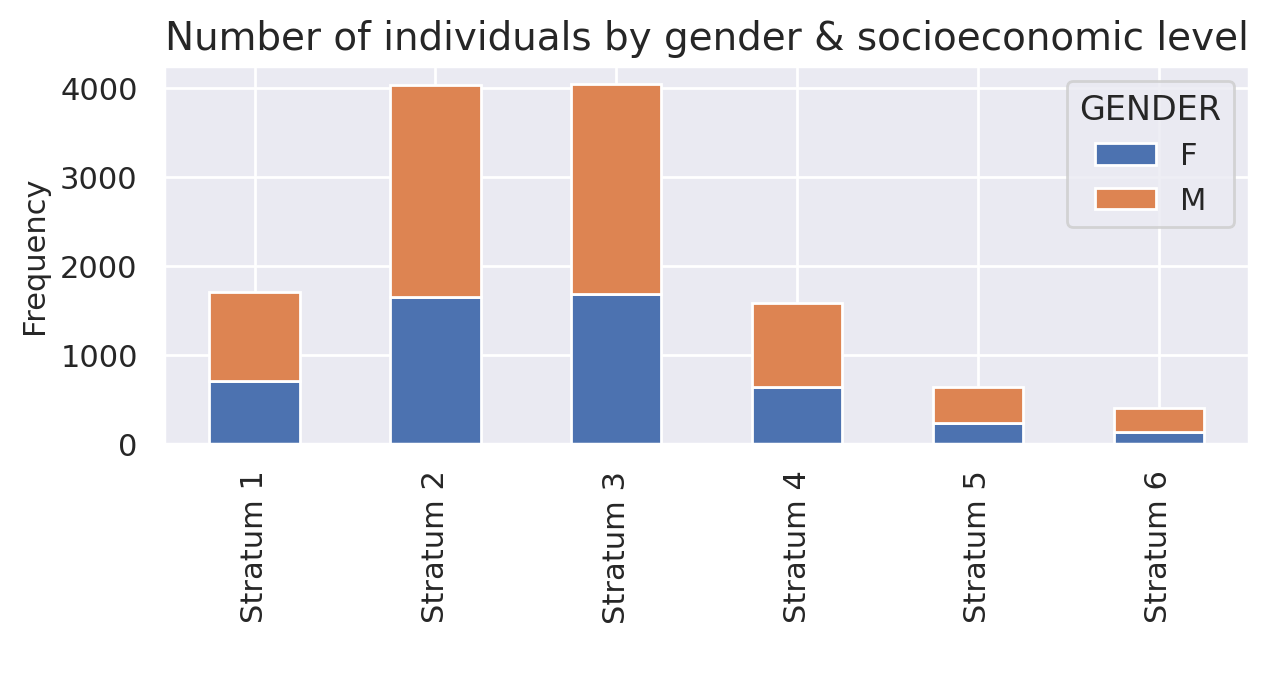

In [30]:
# Create dataframe of number of Males (M) and Females (F) by each stratum level

df_gen_soc = df.groupby(["STRATUM", "GENDER"]).size().reset_index().pivot(columns='GENDER', index='STRATUM', values=0)

# Stacked bar chart of the gender/stratum dataframe above
df_gen_soc.plot(kind='bar', stacked=True)
plt.title("Number of individuals by gender & socioeconomic level", size=14)
plt.ylabel("Frequency", size=11)
plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("gender_STRATUM_amount.png")
plt.show()

## Men and women highschool and college grades average histograms 

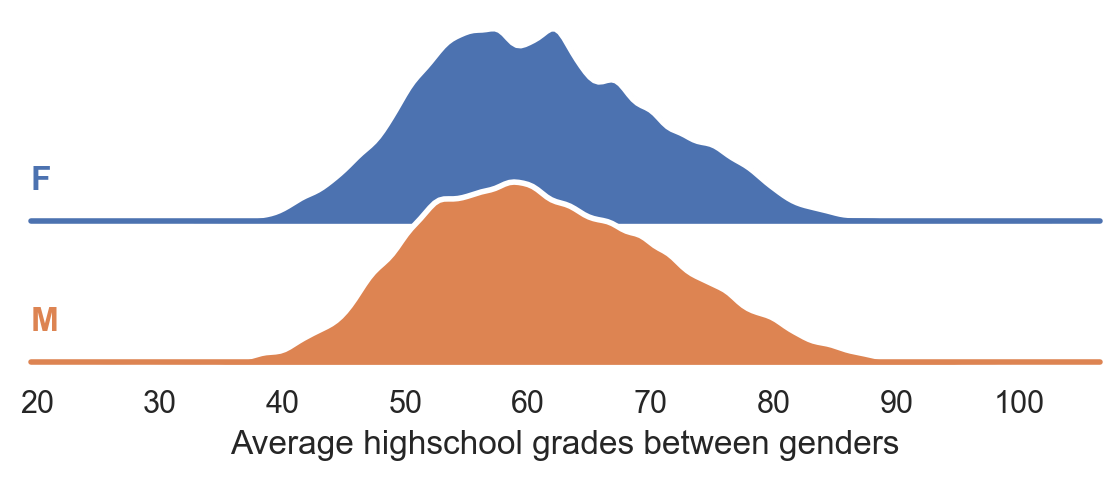

In [71]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv("df_sum_score.csv")

def Ridgeline_dists(df,x, metric="",plot_label=""):
    
    df_temp = df.copy()
    x = x 
    g = df_temp.GENDER
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()
    df_kat_order = df_kat_order.sort_values(by="x", ascending=False)

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.2)
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")

    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 5)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between genders')

# Save as a SVG and PNG
plt.savefig("ridgeline_hi_grade.png")


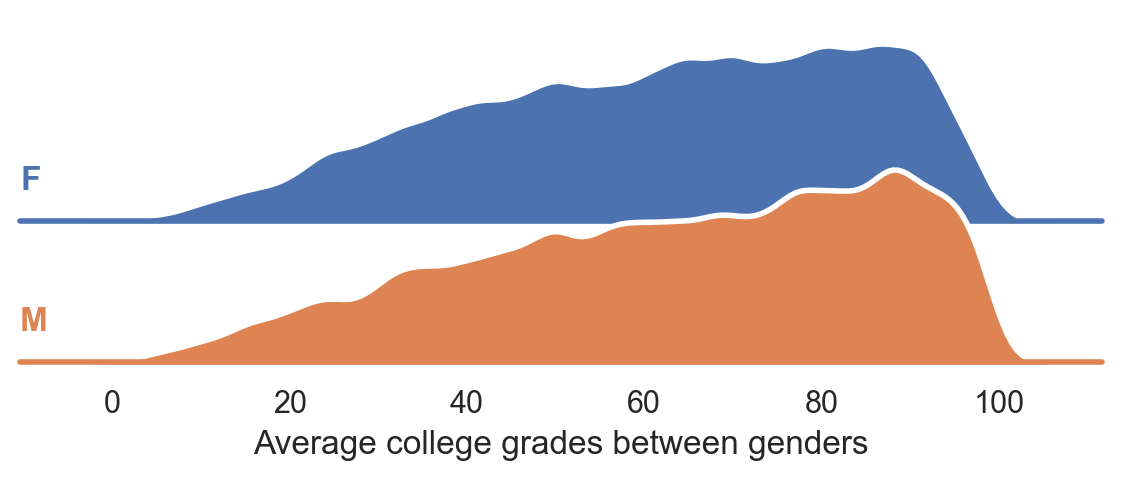

In [69]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between genders')
# Save as a SVG and PNG
plt.savefig("ridgeline_col_grade.png")


## Men and women highschool and college grades average histograms

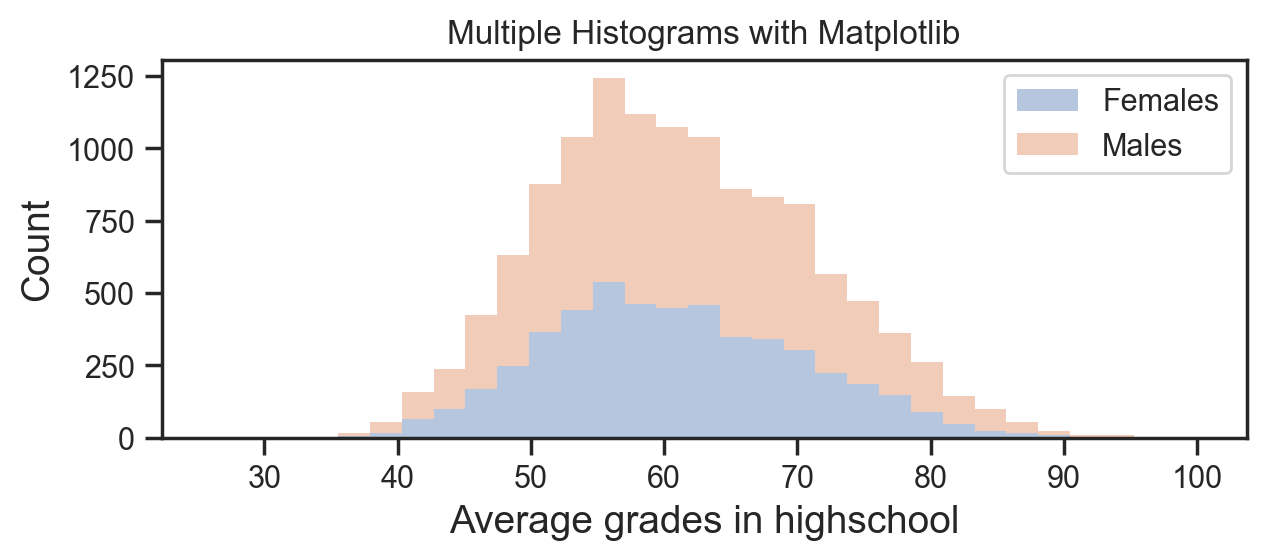

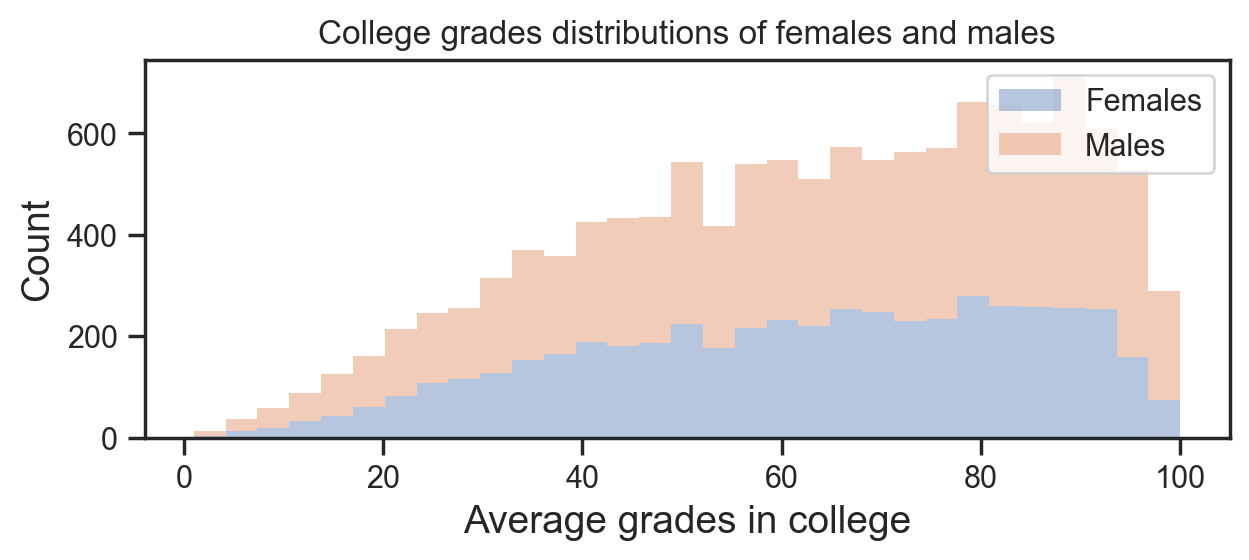

In [18]:
# plt.figure(figsize=(8,6))
sns.set(style='ticks')
men = df[df.GENDER=='M'][['GENDER','HI_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','HI_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.HI_GRADE_AVG, men.HI_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])

plt.xlabel("Average grades in highschool", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')


# Men and women college grades average histograms
# plt.figure(figsize=(8,6))
men = df[df.GENDER=='M'][['GENDER','COL_GRADE_AVG']]
women = df[df.GENDER=='F'][['GENDER','COL_GRADE_AVG']]
fig,ax = plt.subplots()
plt.hist([women.COL_GRADE_AVG, men.COL_GRADE_AVG], 31, histtype='barstacked', density=False, alpha=0.4, edgecolor='none', label=['Females','Males'])
#TODO legend added

plt.xlabel("Average grades in college", size=14)
plt.legend()
plt.ylabel("Count", size=14)
plt.title("College grades distributions of females and males")
plt.legend(loc='upper right')

## Highschool and college grades distributions by socio-economic levels

Vær opmærksom på, at disse ikke viser, hvor mange studerende, der er i hver gruppe. De viser frequnecy af karakterer i hver gruppe. 

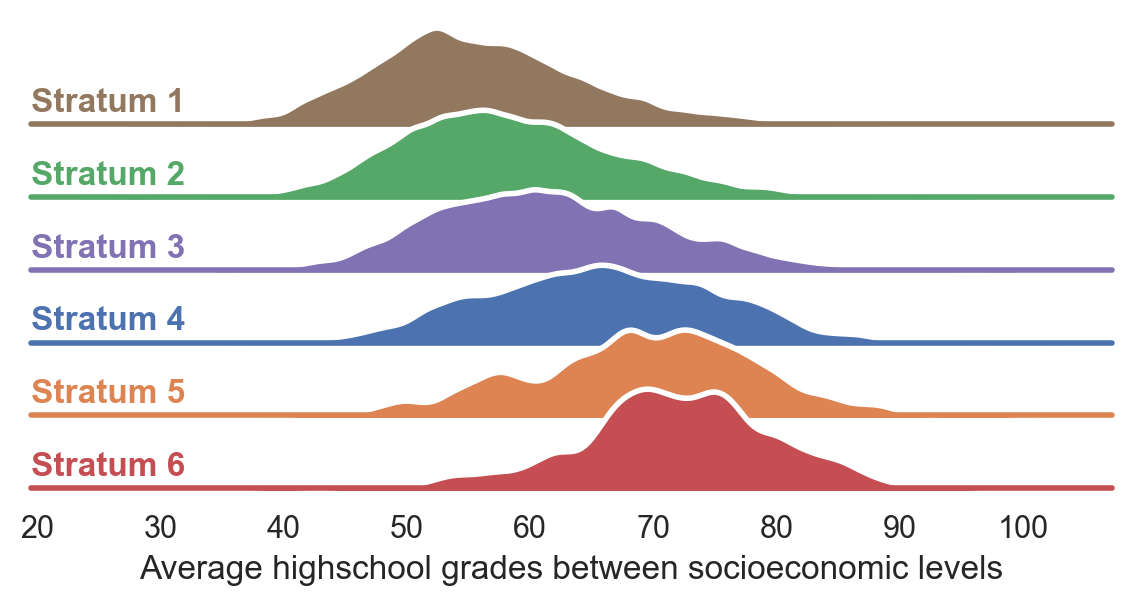

In [76]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pd.read_csv("df_sum_score.csv")
df = df[df.STRATUM!='0']

def Ridgeline_dists(df,x, metric="",plot_label=""):
    df_temp = df.copy()
    x = x 
    g = df_temp.STRATUM
    df_kat = pd.DataFrame(dict(x=x, g=g))
    df_kat_order = df_kat.groupby(["g"]).count()

    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(10, rot=-0.25, light=0.7)
    g = sns.FacetGrid(
        df_kat,
        row="g",
        hue="g",
        aspect=10,
        height=0.8,
        row_order = ['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'],
        # palette=pal # Denne gør den i de 2 blå farver
    )

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "x", bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)#, order =['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=0.5)#,order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])
    g.map(plt.axhline, y=0, lw=2, clip_on=False)#, order=['Stratum 1','Stratum 2','Stratum 3','Stratum 4','Stratum 5','Stratum 6'])

    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(
            0,
            0.2,
            label,
            fontweight="bold",
            color=color,
            ha="left",
            va="center",
            transform=ax.transAxes
        )

    g.map(label, "x")
    
    g.set_xlabels(plot_label)

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-0.30)
    g.fig.set_size_inches(6, 3)
    

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)
    

Ridgeline_dists(df,x=df.HI_GRADE_AVG,plot_label='Average highschool grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_hi_STRATUM.png")

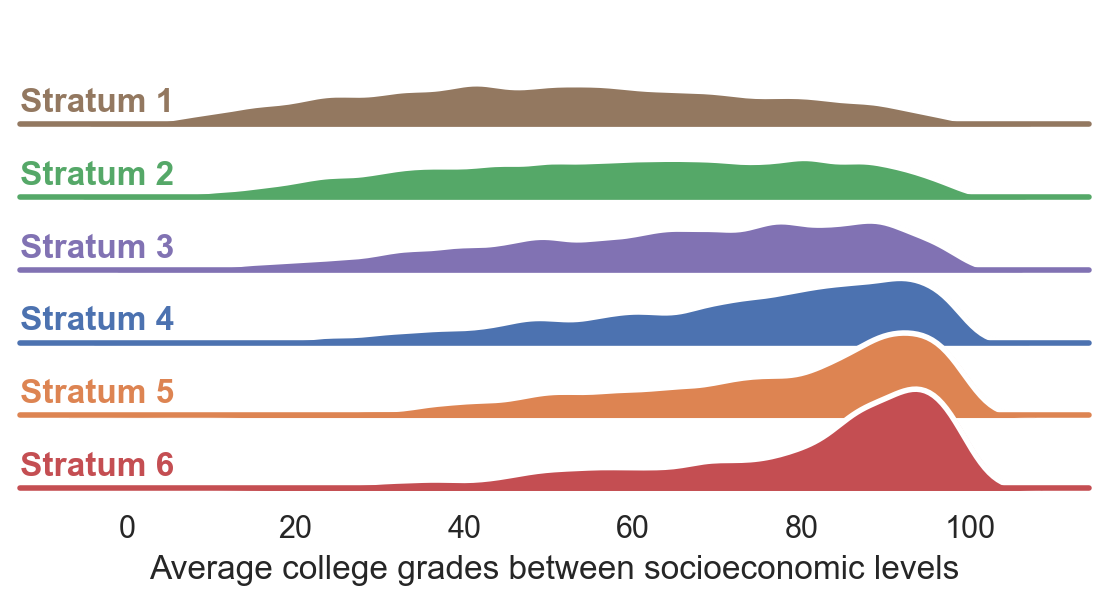

In [77]:
Ridgeline_dists(df,x=df.COL_GRADE_AVG,plot_label='Average college grades between socioeconomic levels')
# Save as a SVG and PNG
plt.savefig("ridgeline_col_STRATUM.png")

## Distribution of grades by gender & socio-economic level (before and after college)

In [79]:
# Create subset of dataframe to use for plot
df = df.copy()
# df = df_norm.copy()
# df = df_stand.copy()

df_gen_soc_hc = df[['HI_GRADE_AVG', 'COL_GRADE_AVG', 'GENDER', 'STRATUM']]

# Columns are renamed to use in plot
df_gen_soc_hc = df_gen_soc_hc.rename(columns = {"HI_GRADE_AVG":"HI", "COL_GRADE_AVG":"COL"})

In [80]:
# Create dataframe with one column of both "HI" and "COL" and another column with respective average HI or COL grade
 # There will be 2*rows of the original df as there will be a "HI" and "COL" for each candidate
df_try = pd.melt(df_gen_soc_hc, id_vars=['GENDER', 'STRATUM']) 
df_try = df_try.rename(columns={"variable":"Average_grade"}) # rename columns to use for plot

#Show dataframe used for plotting
df_try

,GENDER,STRATUM,Average_grade,value
0,F,Stratum 4,HI,74.666667
1,F,Stratum 5,HI,76.333333
2,M,Stratum 2,HI,43.000000
3,F,Stratum 2,HI,59.666667
4,M,Stratum 4,HI,77.666667
...,...,...,...,...
24789,M,Stratum 2,COL,81.333333
24790,M,Stratum 2,COL,31.333333
24791,M,Stratum 2,COL,86.333333
24792,F,Stratum 3,COL,46.333333


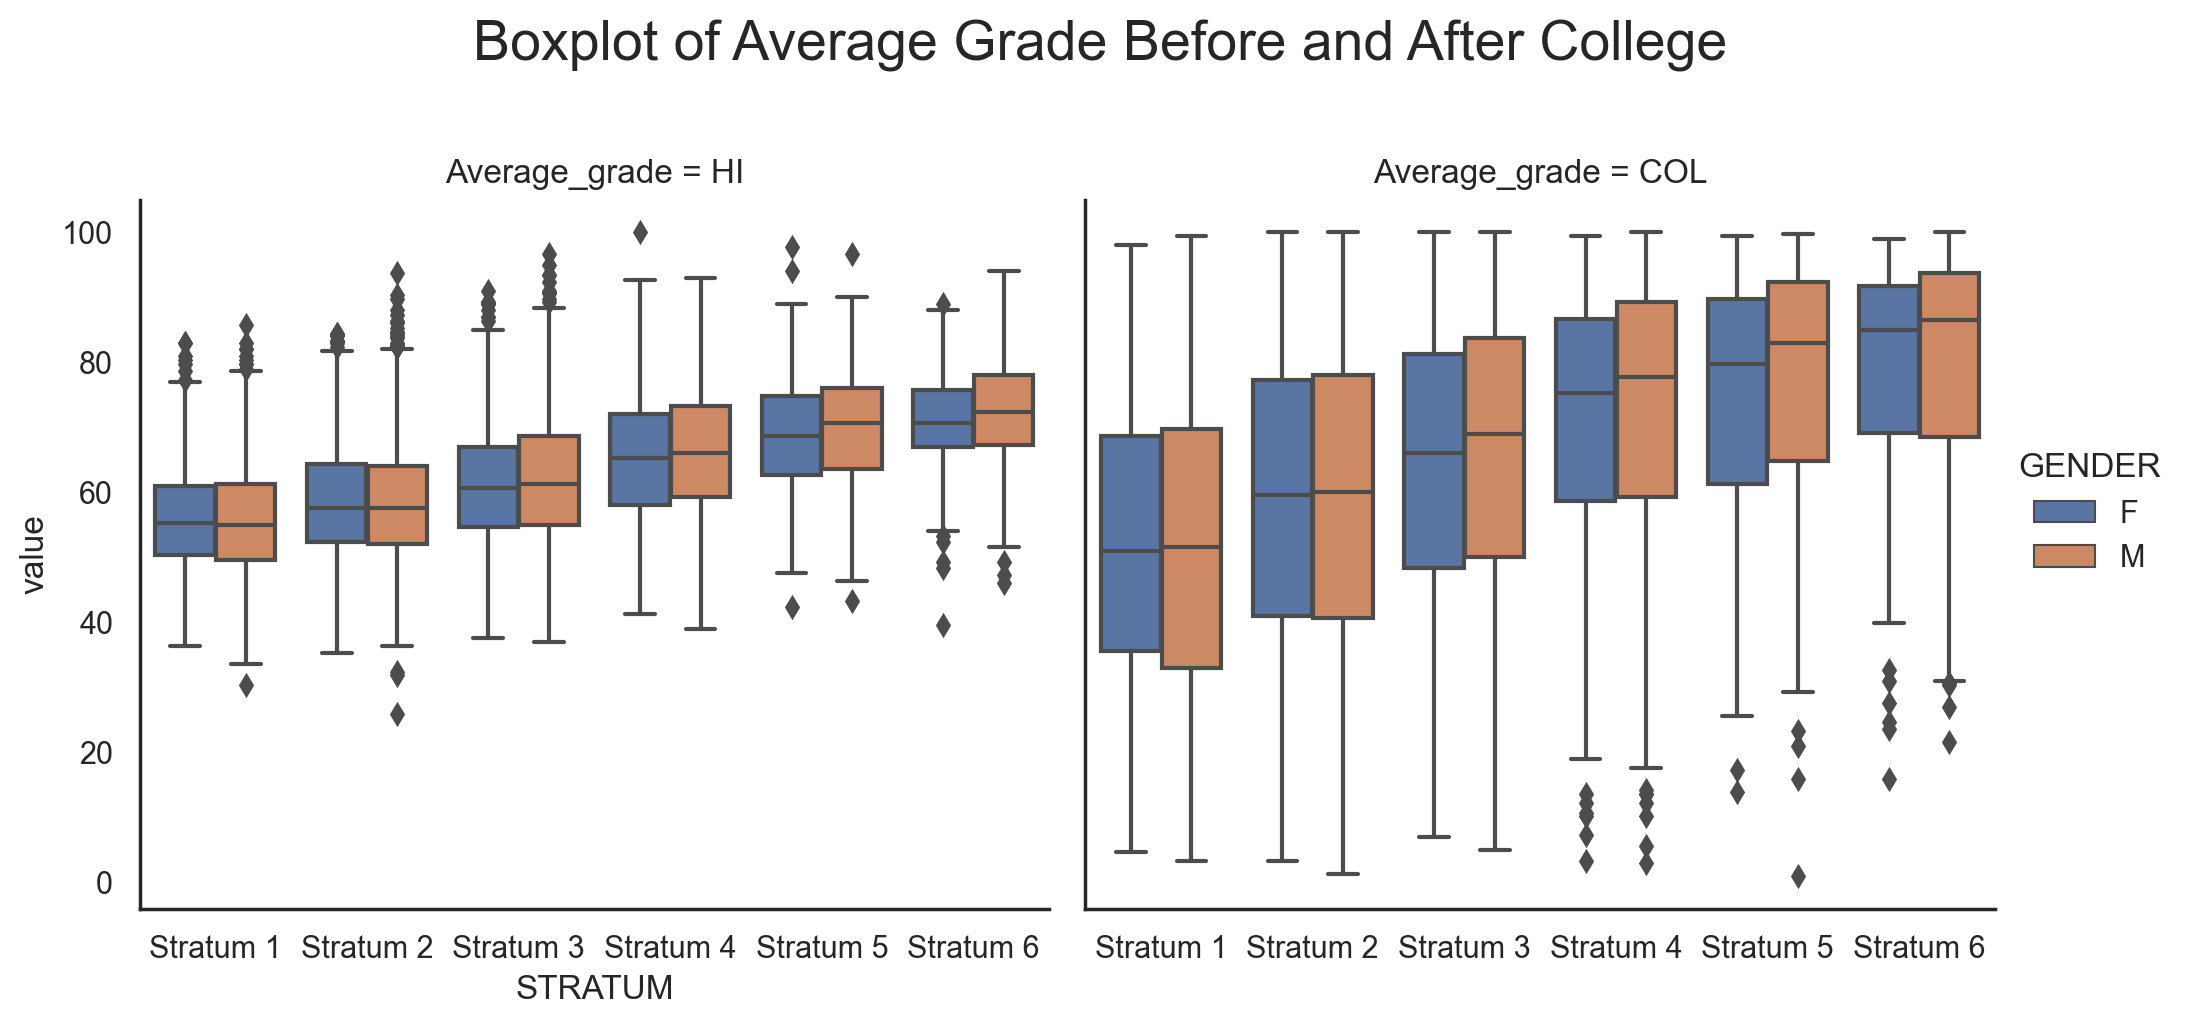

In [90]:
#Plot grouped boxplot of Males and Females, per stratum, in two figures for before college and after college.
b = sns.catplot(data=df_try, x='STRATUM', y='value', 
               hue='GENDER', col='Average_grade',
               kind='box', legend=True, order=["Stratum 1", "Stratum 2", "Stratum 3", "Stratum 4", "Stratum 5", "Stratum 6"])

b.fig.subplots_adjust(top=.8)
b.fig.suptitle('Boxplot of Average Grade Before and After College', size=20)

#plt.xlabel(" ")

# Save as a SVG and PNG
plt.savefig("box_plot_gender_STRATUM.png")
plt.show()


###  Correlation matrix showing the correlation between grades before vs after college

In [37]:
# Dataframe to use for correlation of HI and COL grades
df_corr_HI_COL = df_gen_soc_hc.copy()

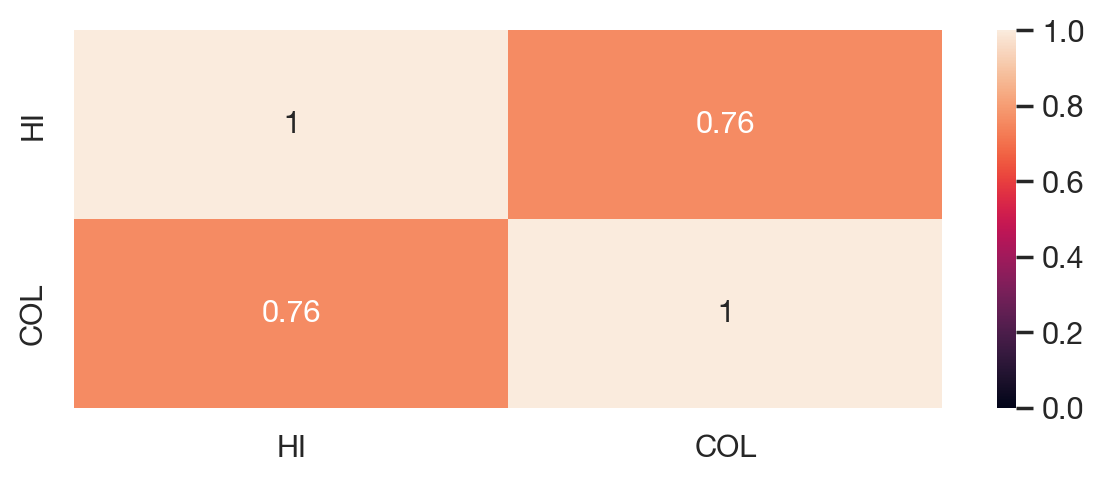

In [38]:
sns.heatmap(df_use[["HI", "COL"]].corr(method="pearson"), vmin=0.0, vmax=1.0, annot = True);

### Correlation matrix showing the (Pearson) correlation between grades (before), grades (after), gender, socio-economic level